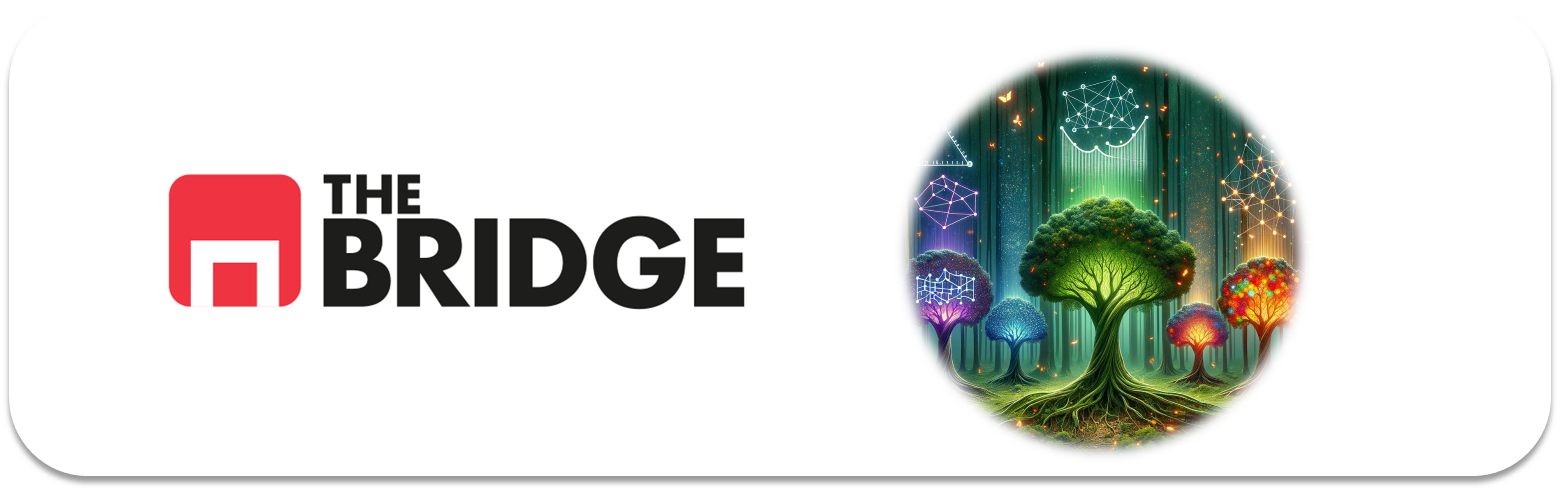

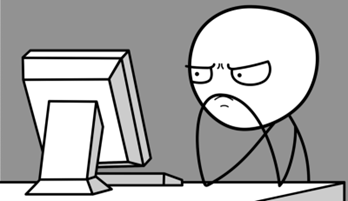

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import matplotlib.pyplot as plt



### Ejercicio 1

Importa el csv "temps.csv"

In [3]:

# 1. Importar el CSV "temps.csv"
data = pd.read_csv('data/temps.csv')


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [4]:

# 2. Hacer un one-hot encoding de las variables categóricas del dataset
data = pd.get_dummies(data, columns=['week'], drop_first=True)


### Ejercicio 3

Divide en train y test

In [5]:

# 3. Dividir en train y test
X = data.drop(columns=['actual'])
y = data['actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [6]:
# 4. Instanciar un DecisionTreeRegressor y entrenarlo
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [7]:

# 5. Calcular el MAE sin usar sklearn
y_pred = model.predict(X_test)
mae = np.mean(np.abs(y_test - y_pred))
print(f'MAE: {mae}')


MAE: 5.0285714285714285


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [8]:

# 6. Calcular el MAPE sin usar sklearn
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape}')


MAPE: 7.924551041406922


### Ejercicio 7

Representa el árbol de decision

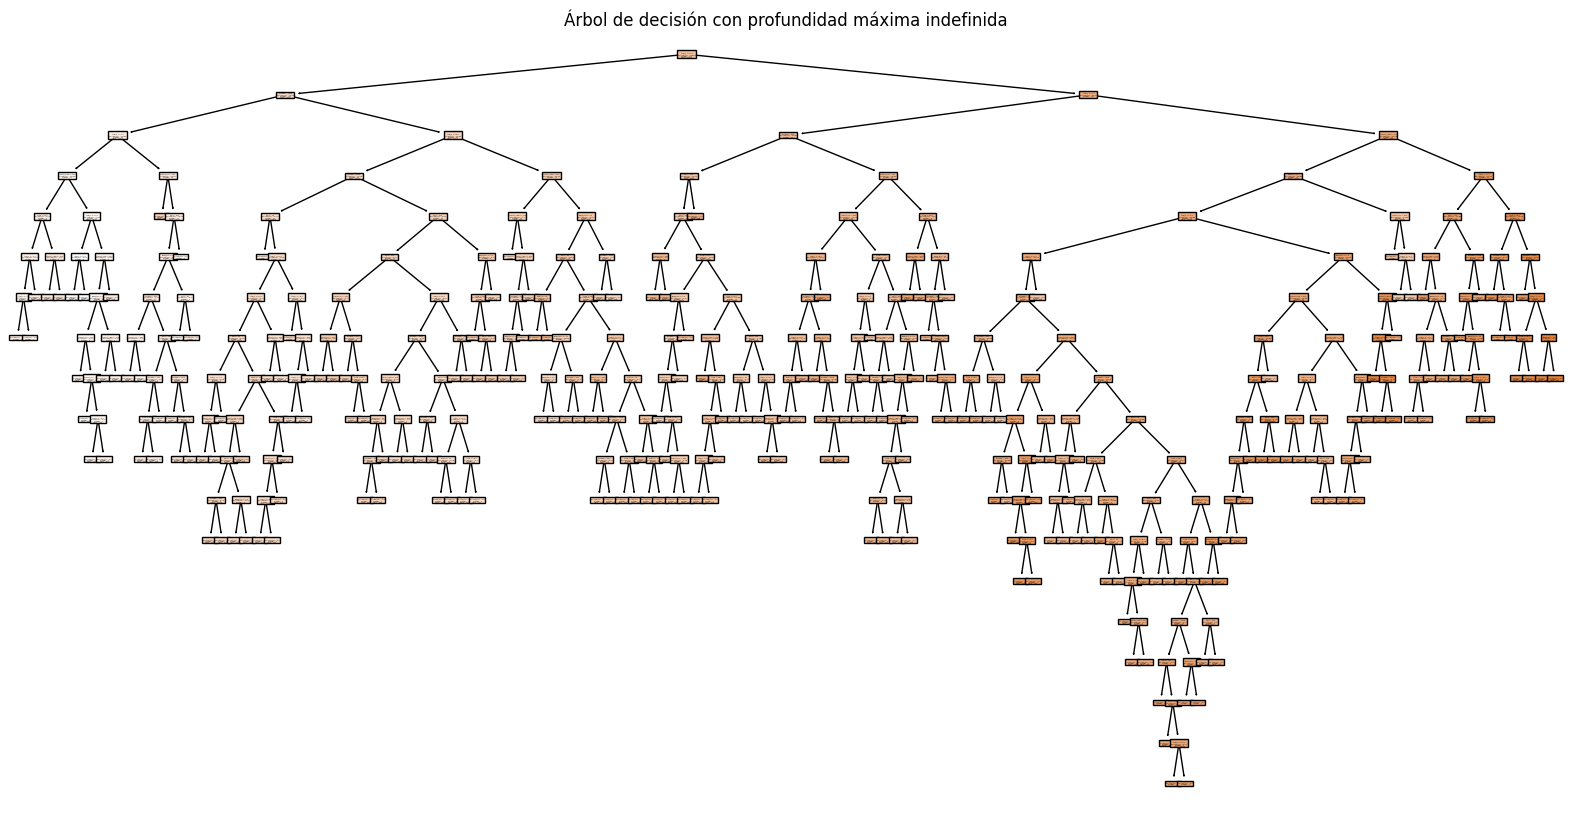

In [9]:

# 7. Representar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.title('Árbol de decisión con profundidad máxima indefinida')
plt.show()


### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [10]:

# 8. Instanciar un nuevo árbol con max_depth a 3 y volver a entrenarlo
model_depth_3 = DecisionTreeRegressor(max_depth=3)
model_depth_3.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [11]:

# 9. Volver a calcular MAE y MAPE
y_pred_depth_3 = model_depth_3.predict(X_test)
mae_depth_3 = np.mean(np.abs(y_test - y_pred_depth_3))
mape_depth_3 = np.mean(np.abs((y_test - y_pred_depth_3) / y_test)) * 100
print(f'MAE (max_depth=3): {mae_depth_3}')
print(f'MAPE (max_depth=3): {mape_depth_3}')



MAE (max_depth=3): 4.424444494299118
MAPE (max_depth=3): 6.938377135428464


### Ejercicio 10

Vuelve a representar su árbol

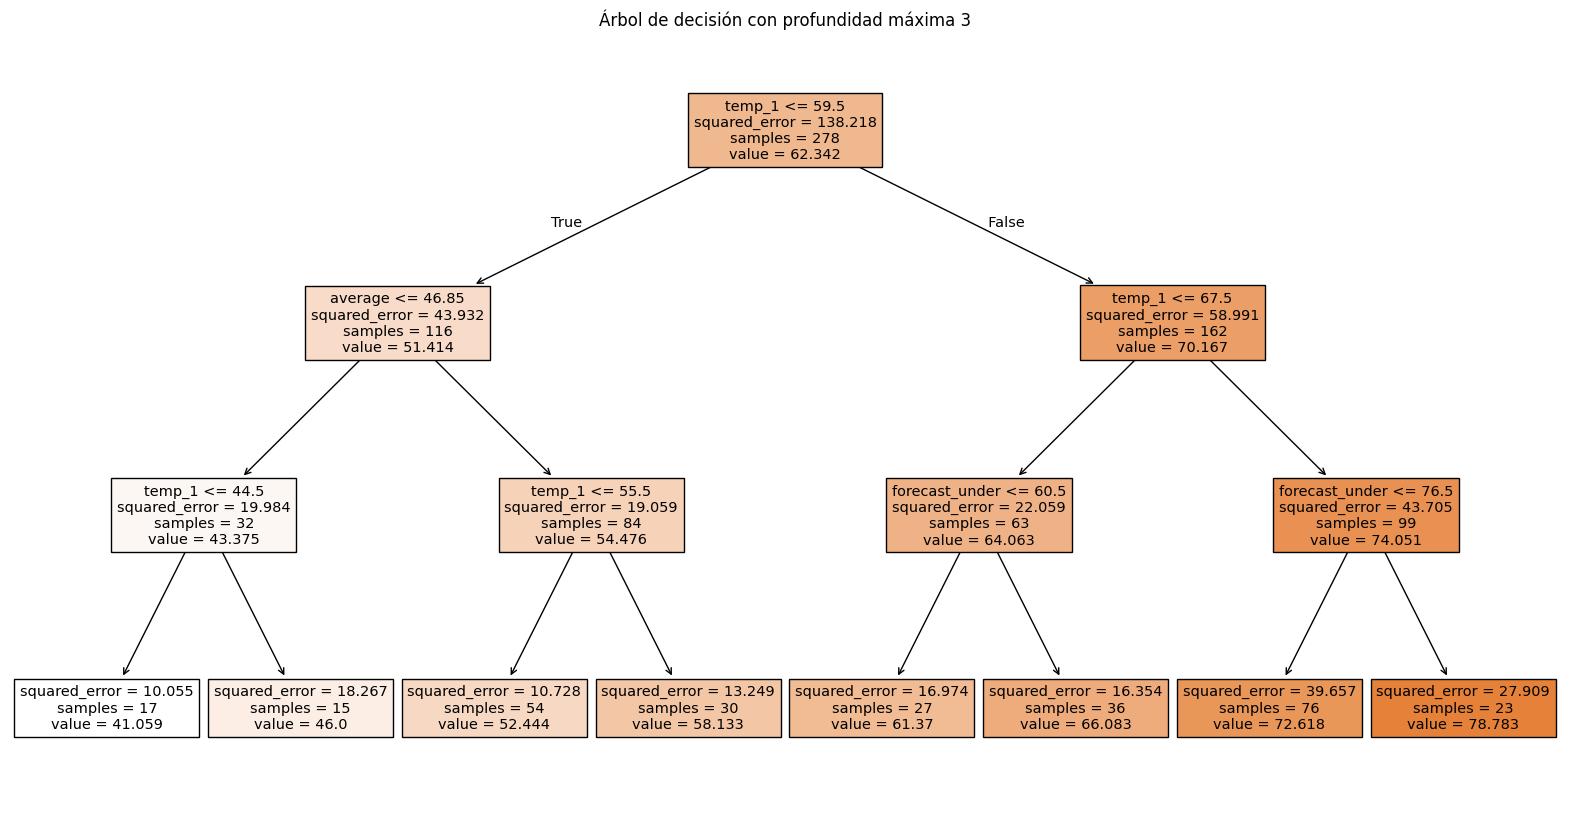

In [12]:

# 10. Volver a representar su árbol
plt.figure(figsize=(20, 10))
plot_tree(model_depth_3, feature_names=X.columns, filled=True)
plt.title('Árbol de decisión con profundidad máxima 3')
plt.show()




### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [13]:


# 11. Obtener el feature_importances de cada variable en el último modelo
feature_importances = model_depth_3.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


           Feature  Importance
4           temp_1    0.880208
5          average    0.088412
8   forecast_under    0.031381
0             year    0.000000
3           temp_2    0.000000
2              day    0.000000
6    forecast_noaa    0.000000
1            month    0.000000
7     forecast_acc    0.000000
9           friend    0.000000
10        week_Mon    0.000000
11        week_Sat    0.000000
12        week_Sun    0.000000
13      week_Thurs    0.000000
14       week_Tues    0.000000
15        week_Wed    0.000000
